In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


df = pd.read_csv(".\Churn_Modelling.csv")
df.sample()
df.drop(columns=['RowNumber', 'CustomerId'], axis=1, inplace=True)

### Exploratory data analysis

The features are:
- **Surname**: last name of the client.
- **CreditScore**: their credit score.
- **Geography**: their country.
- **Gender**: their gender.
- **Age**: their age.
- **Tenure**: how many years they have been on the company.
- **Balance**: their amount of money.
- **NumOfProducts**: the number of products they have with the company.
- **HasCrCard**: whether they have credit card or not.
- **IsActiveMember**: whether they are active members in the company or not.
- **EstimatedSalary**: their estimated salary in USD.
- **Exited**: whether they stay in or leave the company.

In [2]:
df.sample(5)

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
6940,Pisano,575,France,Male,46,1,0.00,2,1,1,65998.26,0
4708,Power,530,Spain,Male,44,6,0.00,2,0,0,55893.37,0
7271,Butler,504,Germany,Male,42,7,131287.36,2,1,1,149697.78,0
5954,Gordon,850,France,Male,33,0,124781.67,1,0,1,33700.52,0
9791,Parkhill,825,Germany,Female,35,6,118336.95,1,1,0,26342.33,1


In [3]:
df.isna().sum()

Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [4]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [5]:
df[['HasCrCard', 'IsActiveMember', 'Exited']].value_counts()

HasCrCard  IsActiveMember  Exited
1          1               0         3125
           0               0         2506
0          1               0         1291
           0               0         1041
1          0               1          942
           1               1          482
0          0               1          360
           1               1          253
Name: count, dtype: int64

Distributions of features by target column Exited

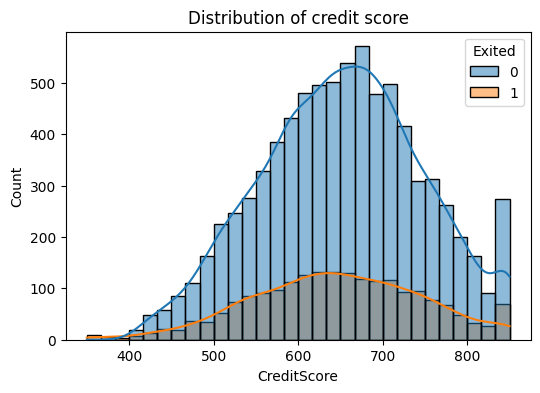

In [6]:
plt.figure(figsize=(6, 4))
sns.histplot(data=df, x="CreditScore", hue='Exited', bins=30, kde=True)
plt.title("Distribution of credit score")
plt.ylabel("Count")
plt.xlabel("CreditScore")
plt.show()

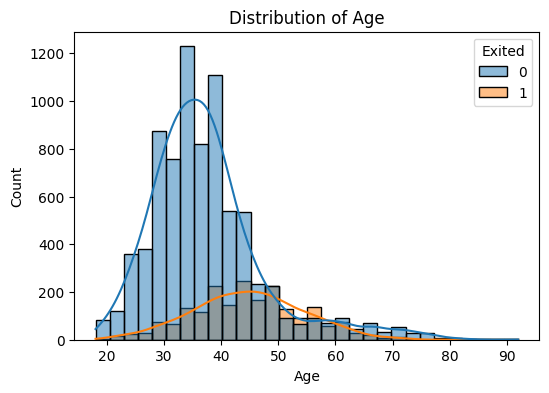

In [7]:
plt.figure(figsize=(6, 4))
sns.histplot(data=df, x="Age", hue='Exited', bins=30, kde=True)
plt.title("Distribution of Age")
plt.ylabel("Count")
plt.xlabel("Age")
plt.show()

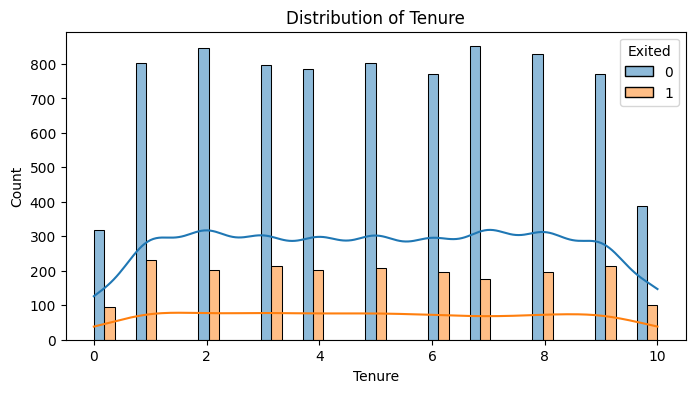

In [8]:
plt.figure(figsize=(8, 4))
sns.histplot(data=df, x="Tenure", hue='Exited', multiple="dodge", kde=True)
plt.title("Distribution of Tenure")
plt.ylabel("Count")
plt.xlabel("Tenure")
plt.show()

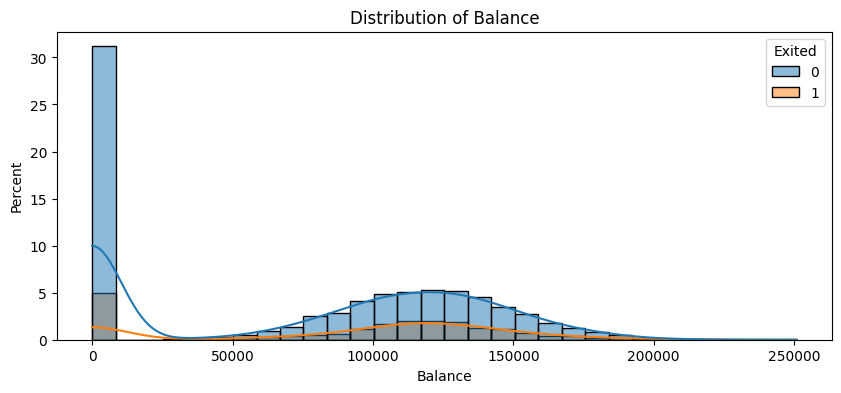

In [9]:
plt.figure(figsize=(10, 4))
sns.histplot(data=df, x="Balance", hue='Exited', kde=True, stat='percent', bins=30)
plt.title("Distribution of Balance")
plt.xlabel("Balance")
plt.show()

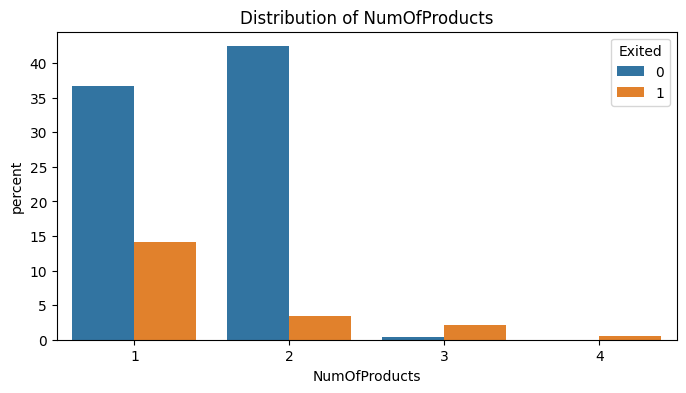

In [10]:
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x="NumOfProducts", hue='Exited', stat="percent")
plt.title("Distribution of NumOfProducts")
plt.xlabel("NumOfProducts")
plt.show()

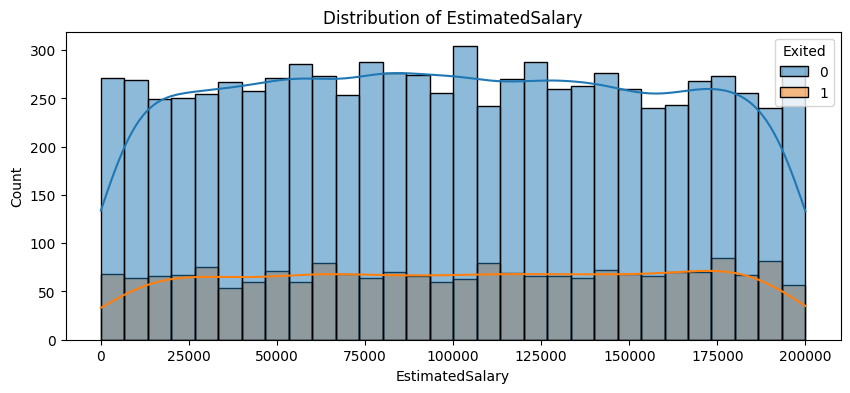

In [11]:
plt.figure(figsize=(10, 4))
sns.histplot(data=df, x="EstimatedSalary", hue='Exited', kde=True, bins=30)
plt.title("Distribution of EstimatedSalary")
plt.xlabel("EstimatedSalary")
plt.show()

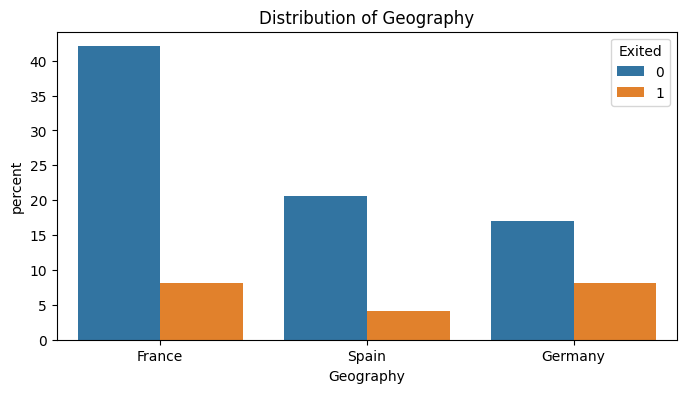

In [12]:
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x="Geography", hue='Exited', stat="percent")
plt.title("Distribution of Geography")
plt.xlabel("Geography")
plt.show()

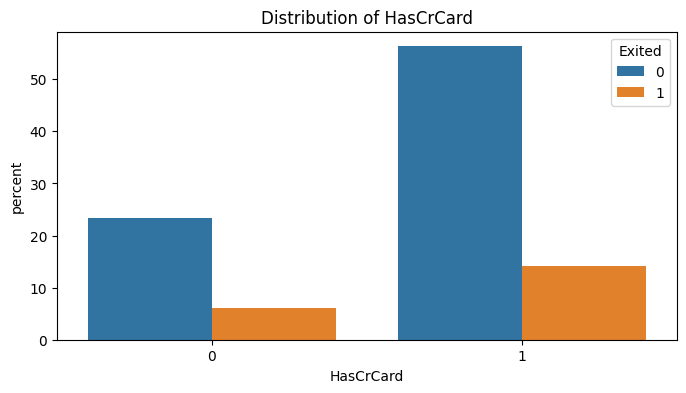

In [13]:
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x="HasCrCard", hue='Exited', stat='percent')
plt.title("Distribution of HasCrCard")
plt.xlabel("HasCrCard")
plt.show()

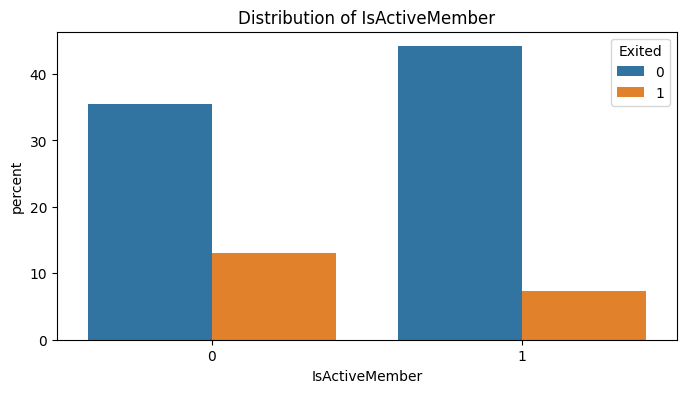

In [14]:
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x="IsActiveMember", hue='Exited', stat='percent')
plt.title("Distribution of IsActiveMember")
plt.xlabel("IsActiveMember")
plt.show()

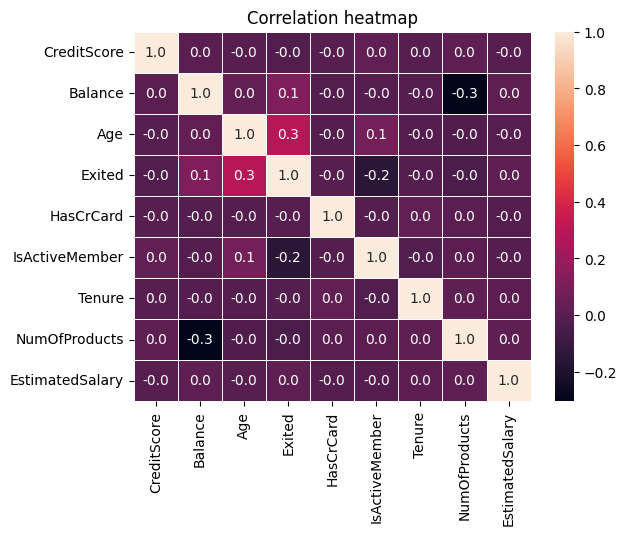

In [15]:
correlacion = df[['CreditScore', 'Balance', 'Age', 'Exited', 'HasCrCard', 'IsActiveMember', 'Tenure', 'NumOfProducts', 'EstimatedSalary']].corr()
sns.heatmap(correlacion,  annot=True, linewidth=.5,  fmt=".1f")
plt.title("Correlation heatmap")
plt.show()

There is no correlation between features and target column Exited, it means that we can't explain wether if a client leaves or stays in the company based on the features like age, balance, credit score and others.

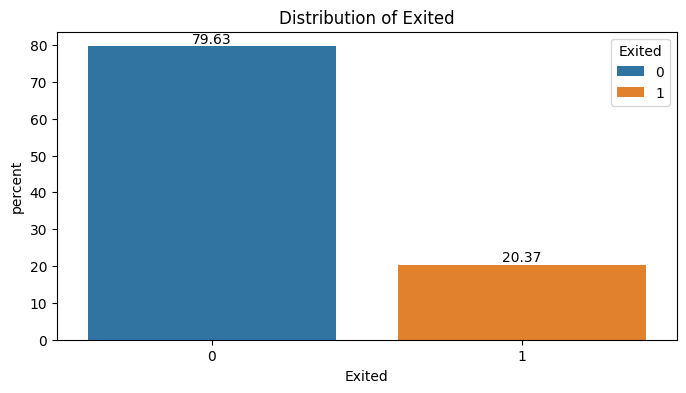

In [16]:
plt.figure(figsize=(8, 4))
ax = sns.countplot(data=df, x="Exited", hue='Exited', stat='percent')
for i in ax.containers:
    ax.bar_label(i,)
plt.title("Distribution of Exited")
plt.xlabel("Exited")
plt.show()

### Modeling

The objective of this modeling phase is to predict if a client whether leaves or stays in the company, so that it can be created marketing campaigns to retain those customers in the future based on data.

I used models such as Logistic Regression, Random Forest and K-Nearest Neighbors and compared them to get the better result.

##### Logistic Regression

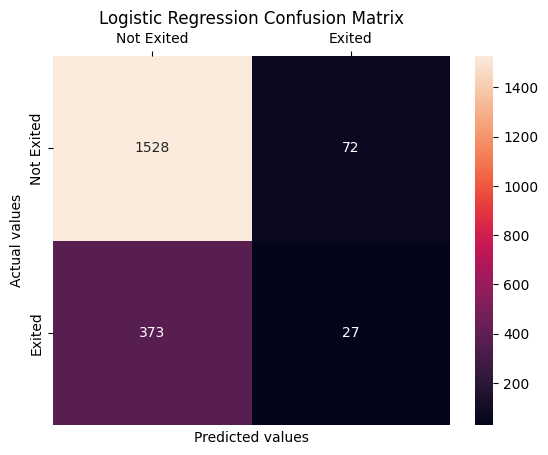

Logistic Regression Classification report
              precision    recall  f1-score   support

           0       0.80      0.95      0.87      1600
           1       0.27      0.07      0.11       400

    accuracy                           0.78      2000
   macro avg       0.54      0.51      0.49      2000
weighted avg       0.70      0.78      0.72      2000

Accuracy score: 0.777
Precision score: 0.273
Recall score: 0.068
F-1 score: 0.108


In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
)


X = df[
    [
        "CreditScore",
        "Balance",
        "Age",
        "HasCrCard",
        "Tenure",
        "NumOfProducts",
        "EstimatedSalary",
    ]
]
y = df["Exited"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

lr_cm = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(
    lr_cm,
    annot=True,
    fmt="g",
    xticklabels=["Not Exited", "Exited"],
    yticklabels=["Not Exited", "Exited"],
)
plt.ylabel("Actual values")
plt.title("Logistic Regression Confusion Matrix")
plt.xlabel("Predicted values")
plt.gca().xaxis.tick_top()
plt.show()

print('Logistic Regression Classification report')
print(classification_report(y_test, y_pred_lr))
print(f'Accuracy score: {round(accuracy_score(y_test, y_pred_lr), 3)}')
print(f'Precision score: {round(precision_score(y_test, y_pred_lr), 3)}')
print(f'Recall score: {round(recall_score(y_test, y_pred_lr), 3)}')
print(f'F-1 score: {round(f1_score(y_test, y_pred_lr), 3)}')

##### Random Forest

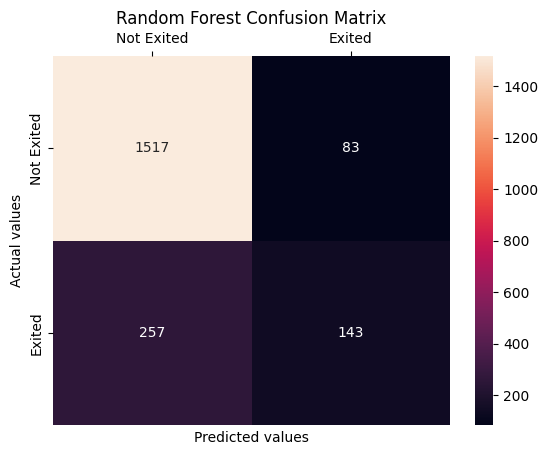

Random Forest Classification report
              precision    recall  f1-score   support

           0       0.86      0.95      0.90      1600
           1       0.63      0.36      0.46       400

    accuracy                           0.83      2000
   macro avg       0.74      0.65      0.68      2000
weighted avg       0.81      0.83      0.81      2000

Accuracy score: 0.83
Precision score: 0.633
Recall score: 0.358
F-1 score: 0.457


In [18]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

rf_cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(
    rf_cm,
    annot=True,
    fmt="g",
    xticklabels=["Not Exited", "Exited"],
    yticklabels=["Not Exited", "Exited"],
)
plt.ylabel("Actual values")
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted values")
plt.gca().xaxis.tick_top()
plt.show()

print('Random Forest Classification report')
print(classification_report(y_test, y_pred_rf))
print(f'Accuracy score: {round(accuracy_score(y_test, y_pred_rf), 3)}')
print(f'Precision score: {round(precision_score(y_test, y_pred_rf), 3)}')
print(f'Recall score: {round(recall_score(y_test, y_pred_rf), 3)}')
print(f'F-1 score: {round(f1_score(y_test, y_pred_rf), 3)}')

##### K-Nearest Neighbors

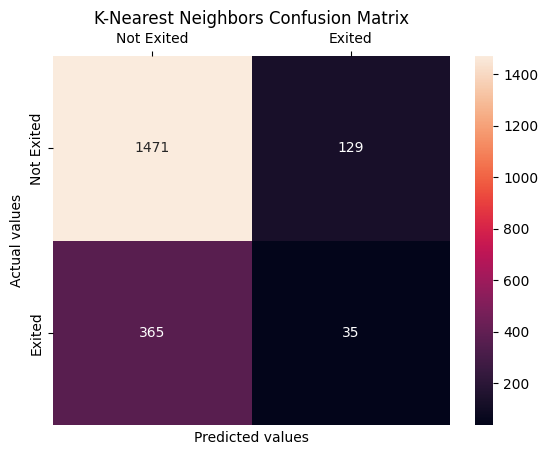

K-Nearest Neighbors Classification report
              precision    recall  f1-score   support

           0       0.80      0.92      0.86      1600
           1       0.21      0.09      0.12       400

    accuracy                           0.75      2000
   macro avg       0.51      0.50      0.49      2000
weighted avg       0.68      0.75      0.71      2000

Accuracy score: 0.753
Precision score: 0.213
Recall score: 0.088
F-1 score: 0.124


In [19]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

knn_cm = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(
    knn_cm,
    annot=True,
    fmt="g",
    xticklabels=["Not Exited", "Exited"],
    yticklabels=["Not Exited", "Exited"],
)
plt.ylabel("Actual values")
plt.title("K-Nearest Neighbors Confusion Matrix")
plt.xlabel("Predicted values")
plt.gca().xaxis.tick_top()
plt.show()

print('K-Nearest Neighbors Classification report')
print(classification_report(y_test, y_pred_knn))
print(f'Accuracy score: {round(accuracy_score(y_test, y_pred_knn), 3)}')
print(f'Precision score: {round(precision_score(y_test, y_pred_knn), 3)}')
print(f'Recall score: {round(recall_score(y_test, y_pred_knn), 3)}')
print(f'F-1 score: {round(f1_score(y_test, y_pred_knn), 3)}')

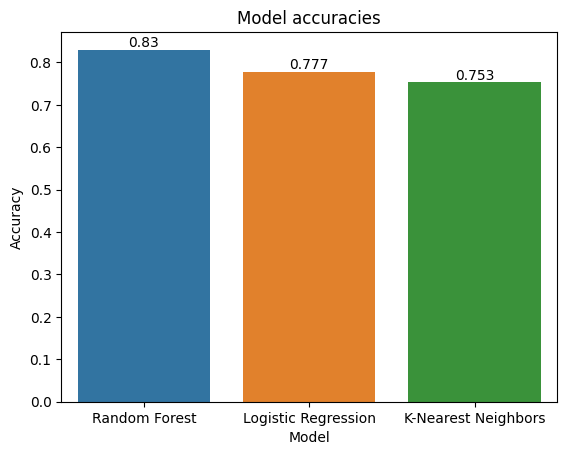

In [20]:
accuracies = {
    "Random Forest": round(accuracy_score(y_test, y_pred_rf), 3),
    "Logistic Regression": round(accuracy_score(y_test, y_pred_lr), 3),
    "K-Nearest Neighbors": round(accuracy_score(y_test, y_pred_knn), 3),
}
accuracy_df = pd.DataFrame(list(accuracies.items()), columns=['Model', 'Accuracy'])
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']

ax = sns.barplot(x='Model', y='Accuracy', data=accuracy_df, hue='Model', palette=colors, legend=False)
for container in ax.containers:
    ax.bar_label(container, fontsize=10)
plt.title('Model accuracies')
plt.show()

We can see that in this case we should use a Random Forest Classification model so we can predict if a client stays in or leaves the company